In [34]:
import numpy
import matplotlib.pyplot as plt

# Generate data

We want to generate some random data with some corrupting noise added:

$y = mx + c + N$

where $N$ is a gaussian zero-mean noise variable: $N ~ (0,\sigma)$

In [35]:
def generate_data(m,c,N):
    xvec = numpy.arange(0,10,10/N)
    noisevec = numpy.random.normal(0.0,3.0,size=N)
    return xvec,(m * xvec + c + noisevec)

In [36]:
xvec,data = generate_data(1.0,2.5,100)

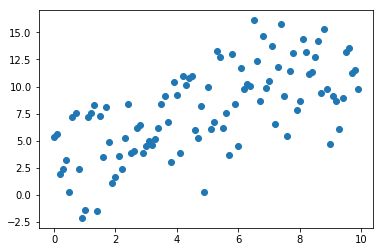

In [37]:
plt.scatter(xvec,data)
plt.show()

# Build Linear System

We want to solve our linear system with a basic linear regression to solve for a best fit line. This means we need to solve for a system of coefficients $x$ using the canonical least squares formulation of $Ax = B$.

To do this we need to define $A$ and $B$ in terms of our model above. $B$ is easy, it's just our vector of observed values $y$. $A$ is the model connecting our input data to our coefficients. For our system it is in the form of:

$$\begin{bmatrix}
x_0 & 1 \\
x_1 & 1 \\
\vdots & \vdots \\
x_N & 1
\end{bmatrix}$$

Based on the canonical least squares regression model of:
$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_N x_N + \epsilon $
where $y$ is our observed variables, $x$ are our input parameters, and $\beta$ are the corresponding coefficients for the system. In our system, $\beta_0 = c$ and $\beta_1 = m$ in our straight line model of $y = mx + c$. $\epsilon$ is a noise term.

We build this matrices up and put them into a simple least squares solver in numpy. The details of how you build a linear least squares solver are in the next notebook.

In [41]:
A = numpy.concatenate((xvec[:,numpy.newaxis],numpy.ones(xvec.shape[0])[:,numpy.newaxis]),axis=1)
B = data
x = numpy.linalg.lstsq(A,B,rcond=None)[0]

In [45]:
print("Least Squares Variables: ")


Least Squares Variables: 
(100, 2)
(100,)


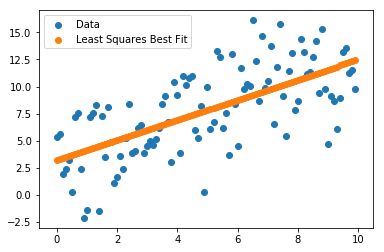

In [43]:
bf_y = x[0] * xvec + x[1]

plt.scatter(xvec,data,label='Data')
plt.scatter(xvec,bf_y,label='Least Squares Best Fit')
plt.legend()
plt.show()